### Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

WeRateDogs banner
Image via Boston Magazine

What Software Do I Need?
The entirety of this project can be completed inside the Udacity classroom on the Project Workspace: Complete and Submit Project page using the Jupyter Notebook provided there. (Note: This Project Workspace may not be available in all versions of this project, in which case you should follow the directions below.)

If you want to work outside of the Udacity classroom, the following software requirements apply:

You need to be able to work in a Jupyter Notebook on your computer. Please revisit our Jupyter Notebook and Anaconda tutorials earlier in the Nanodegree program for installation instructions.
The following packages (libraries) need to be installed. You can install these packages via conda or pip. Please revisit our Anaconda tutorial earlier in the Nanodegree program for package installation instructions.
pandas
NumPy
requests
tweepy
json
You need to be able to create written documents that contain images and you need to be able to export these documents as PDF files. This task can be done in a Jupyter Notebook, but you might prefer to use a word processor like Google Docs, which is free, or Microsoft Word.
A text editor, like Sublime, which is free, will be useful but is not required.
Project Motivation
### Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

### The Data
#### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

Extracted data from tweet text
The extracted data from each tweet's text

I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization.

Dogtionary from WeRateDogs book
The Dogtionary explains the various stages of dog: doggo, pupper, puppo, and floof(er) (via the #WeRateDogs book on Amazon)

### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

### Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Image predictions
Tweet image prediction data

So for the last row in that table:

tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
p1_conf is how confident the algorithm is in its #1 prediction → 95%
p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
p2 is the algorithm's second most likely prediction → Labrador retriever
p2_conf is how confident the algorithm is in its #2 prediction → 1%
p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.
And the #1 prediction for the image in that tweet was spot on:

@dog_rates tweet
A golden retriever named Stuart

So that's all fun and good. But all of this additional data will need to be gathered, assessed, and cleaned. This is where you come in.

### Key Points
Key points to keep in mind when data wrangling for this project:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.
*Fun fact: creating this neural network is one of the projects in Udacity's Data Scientist Nanodegree, Machine Learning Engineer Nanodegree and Artificial Intelligence Nanodegree programs.



#### Import library

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode="wb") as file:
    file.write(response.content)

dfimage = pd.read_csv('image-predictions.tsv', sep = '\t')
response

<Response [200]>

In [4]:
dftwitter = pd.read_csv("twitter-archive-enhanced.csv")

In [5]:

#API take more time i use file json.

consumer_key = 'xxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
with open('tweet-json.txt') as f:
    dftweetsjson = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        dftweetsjson = dftweetsjson.append(data,ignore_index=True)

## Assess

In [7]:
dfimage.shape # show the 12 culomns and 2075 rows

(2075, 12)

In [8]:
dfimage.head() # show first 5 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
dfimage.tail() # show last 5 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [10]:
dfimage.info() # show the types , columns , row and value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
dfimage.describe() 

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
dfimage["tweet_id"].value_counts() 

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [13]:
dfimage["p1"].value_counts()# show the algorithm's used more in prediction 1

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
timber_wolf              1
black-footed_ferret      1
cup                      1
radio_telescope          1
desktop_computer         1
Name: p1, Length: 378, dtype: int64

In [14]:
dfimage["p2"].value_counts()# show the algorithm's used more in prediction 2

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
Kerry_blue_terrier      1
neck_brace              1
ashcan                  1
lampshade               1
promontory              1
Name: p2, Length: 405, dtype: int64

In [15]:
dfimage["p3"].value_counts()# show the algorithm's used more in prediction 3

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
wallet                 1
screw                  1
triceratops            1
buckeye                1
Sussex_spaniel         1
Name: p3, Length: 408, dtype: int64

### dfimage (tweet image predictions) columns:

tweet_id: the unique identifier for each tweet.

jpg_url: dog's image URL.

img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

p1: algorithm's #1 prediction for the image in the tweet.

p1_conf: how confident the algorithm is in its #1 prediction.

p1_dog: whether or not the #1 prediction is a breed of dog.

p2: algorithm's #2 prediction for the image in the tweet.

p2_conf: how confident the algorithm is in its #2 prediction.

p2_dog: whether or not the #2 prediction is a breed of dog.

p3: algorithm's #3 prediction for the image in the tweet.

p3_conf: how confident the algorithm is in its #3 prediction.

p3_dog: whether or not the #3 prediction is a breed of dog.


In [16]:
dftwitter.shape # show the 17 culomns and 2356 rows

(2356, 17)

In [17]:
dftwitter.head() # show first 5 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
dftwitter.tail()# show last 5 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [19]:
dftwitter.describe() 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
dftwitter.info() # show the types , columns , row and value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
dftwitter.name.value_counts() 

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
               ... 
this              1
Cleopatricia      1
Nigel             1
Ember             1
Strider           1
Name: name, Length: 957, dtype: int64

In [22]:
dftwitter.pupper.value_counts() 

None      2099
pupper     257
Name: pupper, dtype: int64

### dftwitter (Twitter archive) columns:

tweet_id: the unique identifier for each tweet.

in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.

in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID.

timestamp: time when this Tweet was created.

source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client.

text: actual UTF-8 text of the status update.

retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID.

retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID.

retweeted_status_timestamp: time of retweet.

expanded_urls: tweet URL.

rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10.

rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10.

name: name of the dog.

doggo: one of the 4 dog "stage".

floofer: one of the 4 dog "stage".

pupper: one of the 4 dog "stage".

puppo: one of the 4 dog "stage".

In [23]:
dftweetsjson.head()# show first 5 

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [24]:
dftweetsjson.tail()# show last 5 

,tweet_id,favorites,retweets
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [25]:
dftweetsjson.describe() 

,tweet_id,favorites,retweets
count,2354,2354,2354
unique,2354,2007,1724
top,667495797102141441,0,3652
freq,1,179,5


In [26]:
dftweetsjson.info()  # show the types , columns , row and value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null object
retweets     2354 non-null object
dtypes: object(3)
memory usage: 55.3+ KB


### dftweetsjson (Twitter Json) columns:

tweet_id: the unique identifier for each tweet.

favorites: refers to topics or subjects that users are most interested in.

retweets:Tweet is a retweet.


## Quality

### dfimage table:

1)tweet_id should convert to str.

2)delete the img_num, jpg_url and  values.

### dftwitter table:

1)None values in name of dogs and incorrect dogs name.

2)Useless columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp should be removed.

3)timestamp should convert to timestamp datatype.

4)Merge the p1, p2 and p3 columns to a prediction column.

5)clean text of Links, punctuation marks, and repeated messages.




### dftweetsjson:

1)convert tweet_id and favorites in table to int datatype , remove the retweet .

### Tidiness :

We have 3 datasets, dfimage , dftwitter, and dftweetsjson dataset , we should merge it in one dataframe.

We have three seperate columns of dog categories, drop the puppo, pupper,floofer and doggo after add to new column.



## Clean:

#### Define

convert tweet_id, retweets, and favorites in table dftweetsjson to int datatype.


#### Code

In [27]:
dftweetsjson['tweet_id'] = dftweetsjson['tweet_id'].apply(pd.to_numeric, errors='coerce')
dftweetsjson['favorites'] = dftweetsjson['favorites'].apply(pd.to_numeric, errors='coerce')
dftweetsjson = dftweetsjson.drop(['retweets'],axis=1)

#### Test

In [28]:
dftweetsjson.dtypes

tweet_id     int64
favorites    int64
dtype: object

#### Define
Merge all three datasets to one dataset, and change datatype of tweet_id, in (twitter_archive_clean and image_predictions_clean.tweet_id) tables.

#### Code

In [29]:
dftwitter_clean = dftwitter.copy()
dfimage_clean = dfimage.copy()
dftweetsjson_celan = dftweetsjson.copy() 

In [30]:
dft_clean = pd.merge(dftwitter_clean, dftweetsjson_celan, on = 'tweet_id', how = 'inner')


In [31]:
dft_clean = pd.merge(dft_clean, dfimage_clean, on = 'tweet_id', how = 'inner')

#### Test

In [32]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

#### Define
We have three seperate columns of dog categories, drop the puppo, pupper,floofer and doggo after add to new column.

#### Code

In [33]:

# melt the 4 stage columns and transfer the values under each tweet_id into a small stage list
# append each stage list into a bigger list
stage = pd.melt(dft_clean, id_vars=['tweet_id'], value_vars=['doggo', 'floofer', "pupper", "puppo"])
stage_list = []
for ids in stage.tweet_id.unique():
    stage_list.append(stage.query('tweet_id == @ids').value.tolist())

In [34]:
# remove repeat value in each stage list
stage_list2 = []
for e in stage_list:
    stage_list2.append(list(set(e)))

In [35]:
# remove the 'None' in stage list which contains any stage value, such as 'doggo', 'floofer', "pupper", "puppo"
stage_list3 = []
for e in stage_list2:
    if len(e) > 1:
        e.remove('None')
        stage_list3.append(e)
    else:
        stage_list3.append(e)

In [36]:
# remove '[]' which wrapped outside the stage value
stage_list4 = []
for e in stage_list3:
    if len(e) > 1:
        stage_list4.append(",".join(e))
    else:
        stage_list4.append(e[0])

In [37]:
dft_clean['stage'] = stage_list4

#### Test

In [38]:
dft_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
793,750117059602808832,NaN,NaN,2016-07-05 00:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calvin. He just loves America so much....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750117059...,...,Shih-Tzu,0.814405,True,Lhasa,0.175220,True,Pekinese,0.008072,True,None
760,754482103782404096,NaN,NaN,2016-07-17 01:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He's currently plotting his reve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754482103...,...,tub,0.596796,False,bathtub,0.381098,False,shower_curtain,0.017629,False,None
1292,689977555533848577,NaN,NaN,2016-01-21 01:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a pup wearing a beret. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689977555...,...,cowboy_hat,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False,None
1524,677334615166730240,NaN,NaN,2015-12-17 03:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog gave up mid jump. 9/10 https://t.co/K...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677334615...,...,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True,None
348,820078625395449857,NaN,NaN,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never wanted to go to a camp more in my e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820078625...,...,school_bus,0.999833,False,cab,0.000160,False,crane,0.000002,False,None
787,750719632563142656,NaN,NaN,2016-07-06 15:54:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meyer. He has to hold somebody's hand ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750719632...,...,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True,None
273,831911600680497154,NaN,NaN,2017-02-15 17:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831911600...,...,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True,None
1110,705970349788291072,NaN,NaN,2016-03-05 04:17:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Venetian Kerploof. Suppo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705970349...,...,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True,None
679,767191397493538821,NaN,NaN,2016-08-21 02:47:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I don't know any of the backstory behind this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767191397...,...,patio,0.708665,False,boathouse,0.110056,False,pier,0.039532,False,doggo
1665,673709992831262724,NaN,NaN,2015-12-07 03:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673709992...,...,Chihuahua,0.330171,True,Siamese_cat,0.181580,False,kelpie,0.178227,True,None


In [39]:
dft_clean['stage'].value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [40]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

#### Define
Merge the p1, p2 and p3 columns to a prediction column.

#### Code

In [41]:
dft_clean['prediction'] = dft_clean[['p1', 'p2', 'p3']].max(axis=1)

In [42]:
dft_clean = dft_clean.drop(['p1','p2','p3'],axis=1)

#### Test

In [43]:
dft_clean['prediction'].sample(10)

355                      toy_poodle
580                           boxer
786                      toy_poodle
159                        bluetick
1850                       papillon
298                        malamute
1382                    toy_terrier
1044                       malamute
1222    soft-coated_wheaten_terrier
1143                         wombat
Name: prediction, dtype: object

In [44]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

#### Define
tweet_id should convert to str.
#### Code

In [45]:
dft_clean.tweet_id = dft_clean.tweet_id.astype(str)

#### Test

In [46]:
dft_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
favorites                       int64
jpg_url                        object
img_num                         int64
p1_conf                       float64
p1_dog                           bool
p2_conf                       float64
p2_dog                           bool
p3_conf                       float64
p3_dog                           bool
stage       


#### Define
delete the img_num and jpg_url values.

#### Code

In [47]:
dft_clean = dft_clean.drop(['img_num','jpg_url'],axis=1)

#### Test

In [48]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073

#### Define
None values in name of dogs and incorrect dogs name.

#### Code

In [49]:
dft_clean.name.value_counts()

None       577
a           55
Charlie     11
Lucy        10
Cooper      10
          ... 
Binky        1
Torque       1
Bones        1
Edd          1
Strider      1
Name: name, Length: 936, dtype: int64

In [50]:
dft_clean.name = dft_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [51]:
dft_clean.name.value_counts()

None       677
Charlie     11
Oliver      10
Lucy        10
Penny       10
          ... 
Edd          1
Bloo         1
Sobe         1
Erik         1
Strider      1
Name: name, Length: 914, dtype: int64


#### Define
Useless columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp should be removed.

#### Code

In [52]:
dft_clean = dft_clean[dft_clean.retweeted_status_id.isnull()]

In [53]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
favorites                     1994 no

In [54]:
dft_clean = dft_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 
'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


#### Test

In [55]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
favorites             1994 non-null int64
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
stage                 1994 non-null object
prediction            1994 non-null obj


#### Define
timestamp should convert to timestamp datatype.

#### Code

In [56]:

dft_clean['timestamp'] = pd.to_datetime(dft_clean['timestamp'])

#### Test

In [57]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
favorites             1994 non-null int64
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
stage                 1994 non-null object
prediction            1994


#### Define
clean text of Links, punctuation marks, and repeated messages.

#### Code

In [58]:
pd.set_option('display.max_colwidth', -1)# display more text

In [59]:
english_punctuations = string.punctuation


def remove_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

In [60]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [61]:
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    
    return tweet

In [62]:
dft_clean["clean text"] = dft_clean['text'].apply(lambda x: processPost(x))

#### Test

In [63]:
dft_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorites,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,stage,prediction,clean text
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,39467,0.097049,False,0.085851,False,0.076110,False,None,orange,This is Phineas Hes a mystical boy Only ever apears in the hole of a donut 1310
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,33819,0.323581,True,0.090647,True,0.068957,True,None,papillon,This is Tily Shes just checking pup on you Hopes youre doing ok If not shes available for pats snugs bops the whole bit 1310
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,...,25461,0.716012,True,0.078253,True,0.031379,True,None,malamute,This is Archie He is a rare Norwegian Pouncing Corgo Lives in the tal gras You never know when one may strike 1210
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,...,42908,0.170278,False,0.168086,True,0.040836,False,None,spatula,This is Darla She comenced a snoze mid meal 1310 hapens to the best of us
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,...,41048,0.555712,True,0.225770,True,0.175219,True,None,basset,This is Franklin He would like you to stop caling him cute He is a very fierce shark and should be respected as such 1210 BarkWek


### Store the clean data

In [64]:
dft_clean.to_csv("twitter_archive_master.csv", encoding="utf-8")

In [65]:
dft_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorites,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,stage,prediction,clean text
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,39467,0.097049,False,0.085851,False,0.076110,False,None,orange,This is Phineas Hes a mystical boy Only ever apears in the hole of a donut 1310
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,33819,0.323581,True,0.090647,True,0.068957,True,None,papillon,This is Tily Shes just checking pup on you Hopes youre doing ok If not shes available for pats snugs bops the whole bit 1310
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,...,25461,0.716012,True,0.078253,True,0.031379,True,None,malamute,This is Archie He is a rare Norwegian Pouncing Corgo Lives in the tal gras You never know when one may strike 1210
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,...,42908,0.170278,False,0.168086,True,0.040836,False,None,spatula,This is Darla She comenced a snoze mid meal 1310 hapens to the best of us
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,...,41048,0.555712,True,0.225770,True,0.175219,True,None,basset,This is Franklin He would like you to stop caling him cute He is a very fierce shark and should be respected as such 1210 BarkWek


### Visualization Process

Visualizing the stage of dog.

Visualizing the top 10 of name dogs.

Visualizing the most of output's algorithm's prediction for the image in the tweet.

Visualizing the word of text clean and look the more tweet for what stage dog.


### Visualize: the stage of dog.

In [66]:
dft_cleanstage = dft_clean['stage'].value_counts()

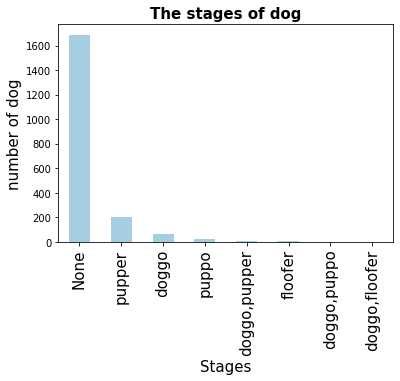

In [67]:
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Stages', fontsize=15)
ax.set_ylabel('number of dog' , fontsize=15)
ax.set_title('The stages of dog', fontsize=15, fontweight='bold')

dft_cleanstage.plot(ax=ax, kind='bar', colormap='Paired')

The highest stage for dogs is the unknown take 1750 , then pupper less than 250 dog , doggo less thean 100, puppo maybe 11, the ather maybe 1 or nothing 'pupper,doggo' ,floofer,'floofer,doggo'and 'puppo,doggo'.


### Visualize:  top 10 of name dogs.

In [68]:
dft_clean["name"].replace("None","Dogs",inplace=True)

In [69]:
dft_cleanname = dft_clean['name'].value_counts()

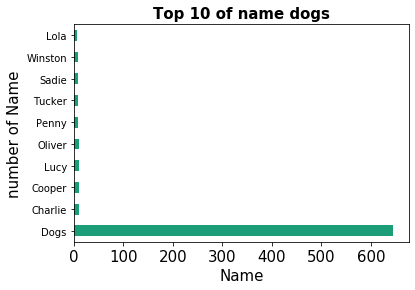

In [70]:
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Name', fontsize=15)
ax.set_ylabel('number of Name' , fontsize=15)
ax.set_title('Top 10 of name dogs', fontsize=15, fontweight='bold')

dft_cleanname[:10].plot(ax=ax, kind='barh', colormap='Dark2')

The top 10 of names dogs are: 'Dogs' name it's any name mistak or wrong input and it take more of the other name of dogs , and then Charlie,Penny,Tucker,Lucy,Cooper,Oliver,Winston,Sadie and Bo.


### Visualize: the most of output's a algorithm's  prediction for the image in the tweet.


In [71]:
dft_cleanP = dft_clean['prediction'].value_counts()

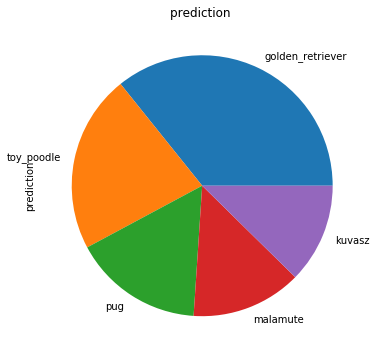

In [72]:
dft_cleanP[:5].plot.pie(figsize=(6, 6),title="prediction ")

The highest outputs of using algorithm on images and type of dog shown are Golden_retiever, Toy_poodle, Pug, Malamute and Kuvasz.

### Visualizing the word of text clean and look the more tweet for what stage dog.

In [73]:
dft_clean['text length'] = dft_clean['clean text'].apply(len)

In [74]:
dft_clean['text length']

0       80 
1       125
2       115
3       74 
4       130
       ... 
2068    92 
2069    108
2070    98 
2071    110
2072    99 
Name: text length, Length: 1994, dtype: int64

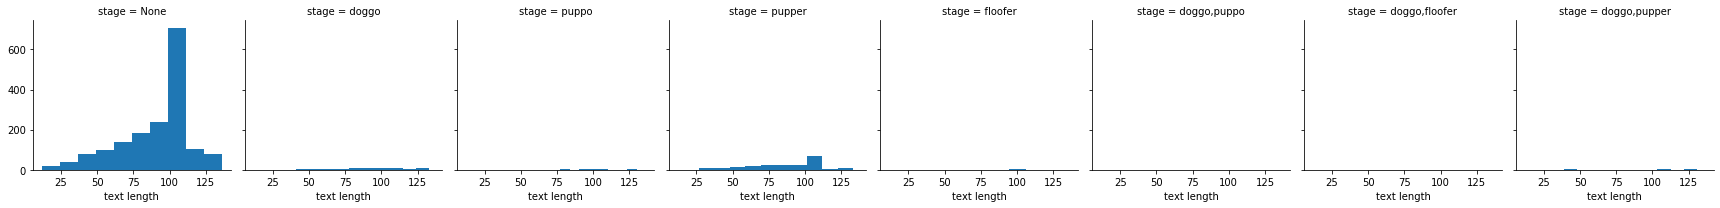

In [75]:
g = sns.FacetGrid(data=dft_clean, col='stage')
g.map(plt.hist, 'text length', bins=10)

look the length of first tweet the have 80 words and the secend the have 125 etc... , but the word of the stage dogs the first stage is none it's length word in 0 to 200 id the take 25 to 90 and 125 word text and after the 200 id the 100 to 110 word text.
the ather stage not more word in text exsept pupper have word text but maximum 100 word.

In [76]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
favorites             1994 non-null int64
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
stage                 1994 non-null object
prediction            1994